# Pima Indians Diabetes Database

Dataset: [kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download)
___
## About Dataset

**Context**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. 
In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Content**

The datasets consists of several medical predictor variables and one target variable, Outcome. 
Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**Elements**

* *Pregnancies*: Number of times pregnant
* *Glucose*: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* *BloodPressure*: Diastolic blood pressure (mm Hg)
* *SkinThickness*: Triceps skin fold thickness (mm)
* *Insulin*: 2-Hour serum insulin (mu U/ml)
* *BMI*: Body mass index (weight in kg/(height in m)^2)
* *DiabetesPedigreeFunction*: Diabetes pedigree function
* *Age*: Age (years)
* *Outcome*: Class variable (0 or 1) 268 of 768 are 1, the others are 0
___

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

%matplotlib inline
sb.set()

In [24]:
# import dataset
diabetes_rawdata= pd.read_csv('diabetes.csv',sep=',')
diabetes_rawdata.sample(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
715            7      187             50             33      392  33.9   
111            8      155             62             26      495  34.0   
372            0       84             64             22       66  35.8   
218            5       85             74             22        0  29.0   
377            1       87             60             37       75  37.2   
504            3       96             78             39        0  37.3   
273            1       71             78             50       45  33.2   
402            5      136             84             41       88  35.0   
695            7      142             90             24      480  30.4   
134            2       96             68             13       49  21.1   

     DiabetesPedigreeFunction  Age  Outcome  
715                     0.826   34        1  
111                     0.543   46        1  
372                     0.545   21        0  
218                     1.224   32        1  
377                     0.509   22        0  
504                     0.238   40        0  
273                     0.422   21        0  
402                     0.286   35        1  
695                     0.128   43        1  
134                     0.647   26        0

In [25]:
diabetes_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [26]:
diabetes_rawdata.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [27]:
tile = diabetes_rawdata.columns
tile = tile.drop('Outcome')
tile.values.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

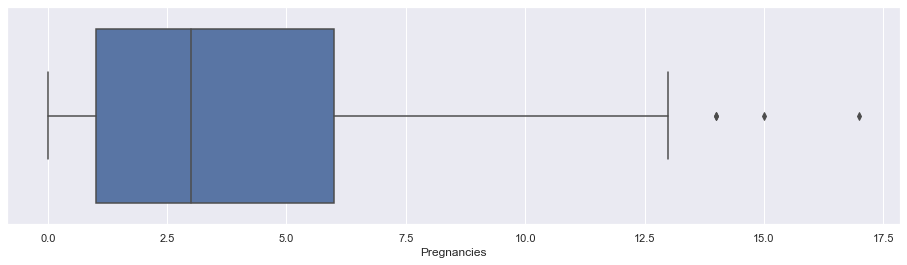

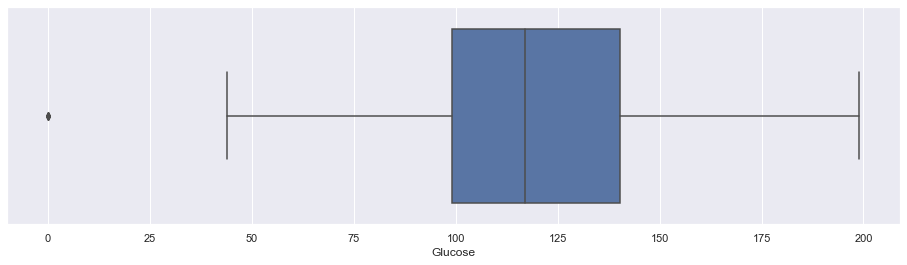

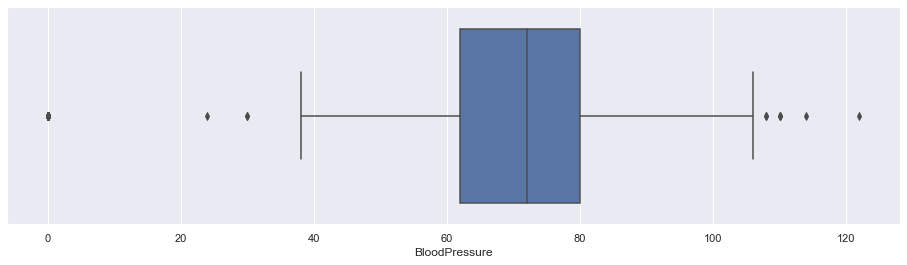

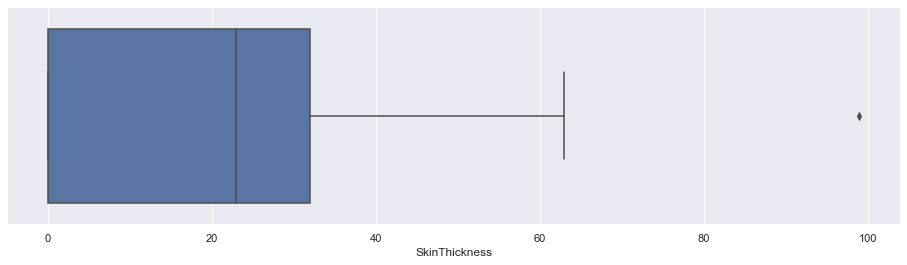

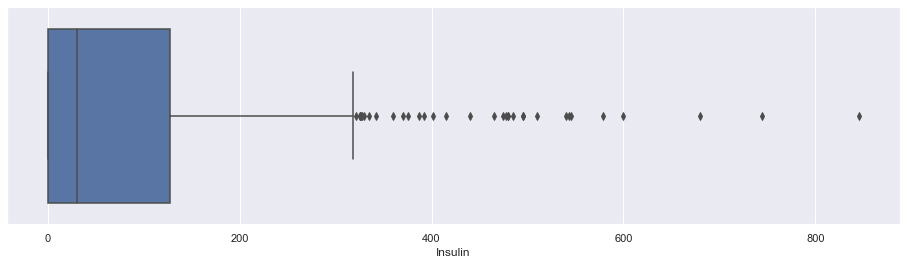

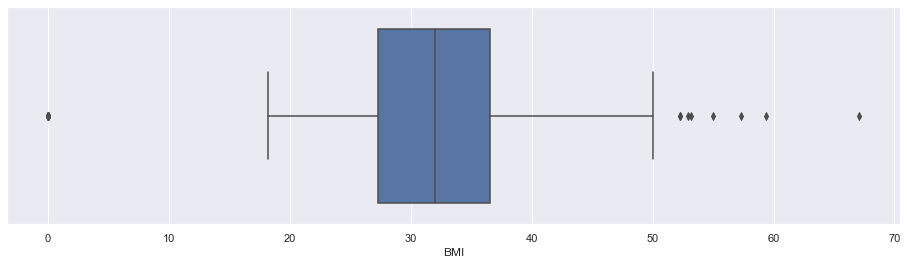

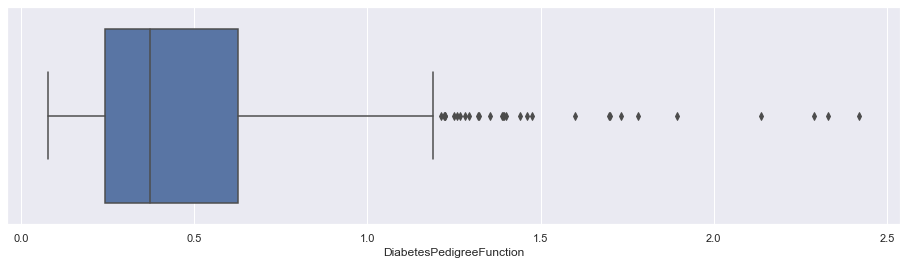

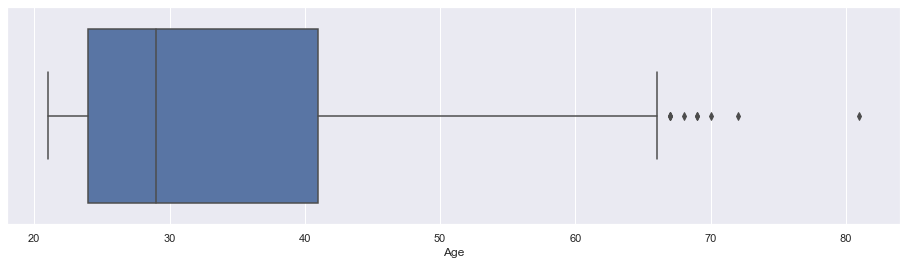

In [28]:
for var in diabetes_rawdata[tile]:                                      # iterate over numerical attributes
  fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,4))  # setup the frame of the plot
  sb.boxplot(data=diabetes_rawdata, x=var, orient='h')   

### Data Pre-processing

In [29]:
num_insulin = diabetes_rawdata['Outcome'].loc[(diabetes_rawdata['Insulin'] ==0)].count()
num_skin = diabetes_rawdata['Outcome'].loc[(diabetes_rawdata['SkinThickness'] ==0)].count()


In [30]:
print('Number of zero values of Insulin:', num_insulin)
print('Number of zero values of SkinThickness:', num_skin)


Number of zero values of Insulin: 374
Number of zero values of SkinThickness: 227


For **Insulin** **BloodPressure**, **BMI**, **Glucose** and  **SkinThickness**, theres zero values which is impossible.
As the dataset is relatively small size of 700++, we want to keep the dataset as big as possible.
The size of the data will decreses tremendously if delecting the rows of '0' values.
Hence, we will replace '0' with the mean values instead.


In [31]:
# replace zero values with mean values in the below catagories:
data_new = diabetes_rawdata.copy()

data_new['Insulin'].replace({0: data_new['Insulin'].mean().astype('int')},inplace=True)

data_new['SkinThickness'].replace({0: data_new['SkinThickness'].mean().astype('int')},inplace=True)

data_new['Glucose'].replace({0: data_new['Glucose'].mean().astype('int')},inplace=True)

data_new['BMI'].replace({0: data_new['BMI'].mean().astype('int')},inplace=True)

data_new['BloodPressure'].replace({0: data_new['BloodPressure'].mean().astype('int')},inplace=True)



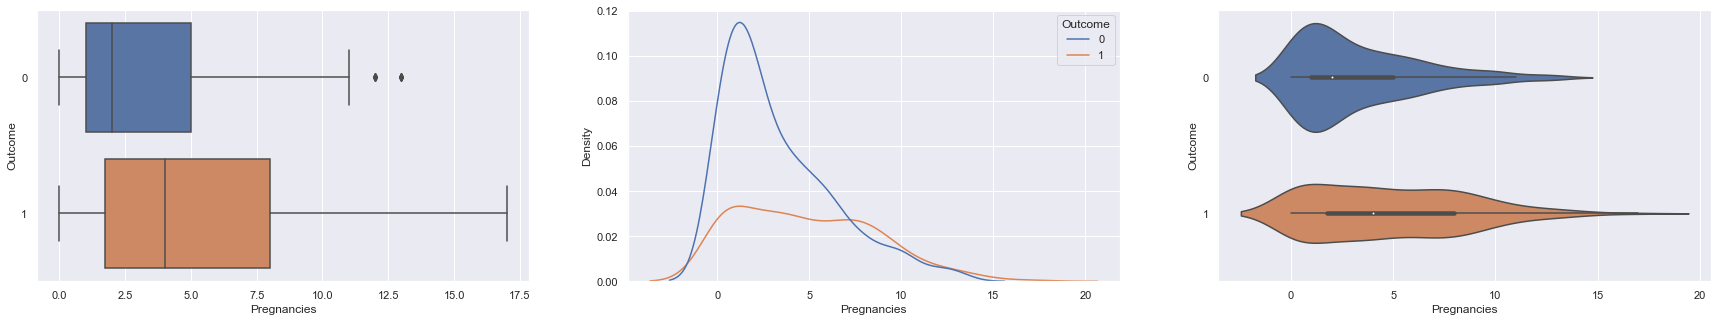

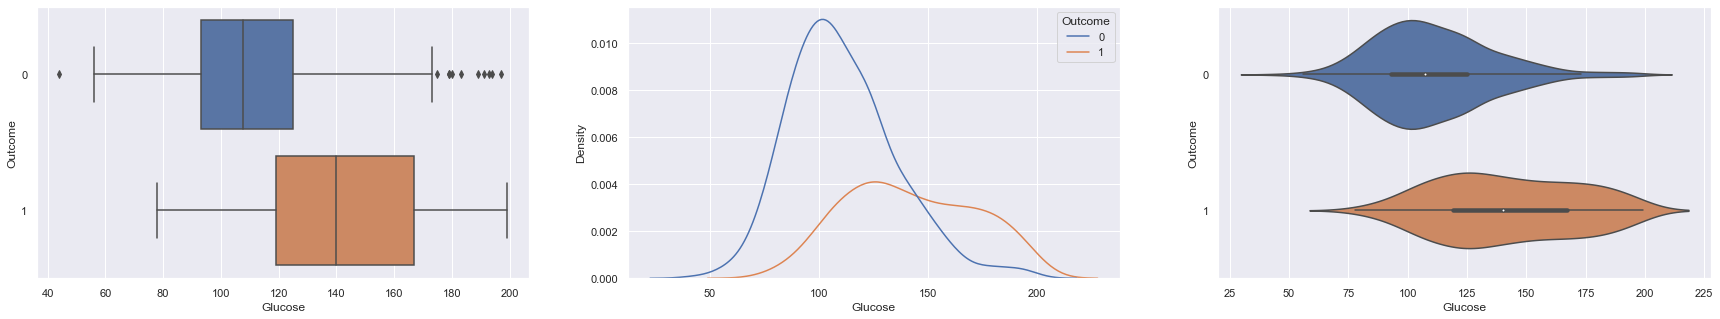

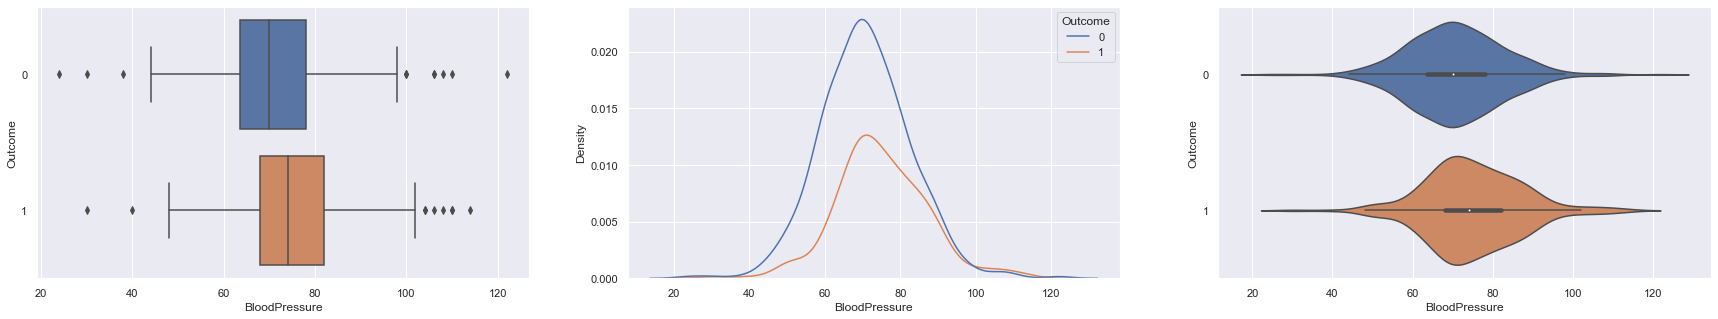

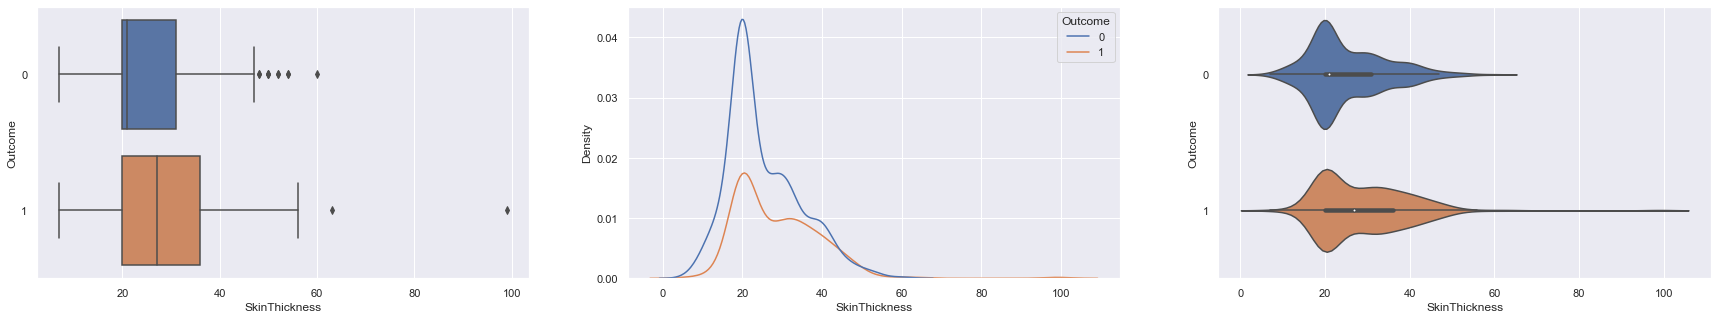

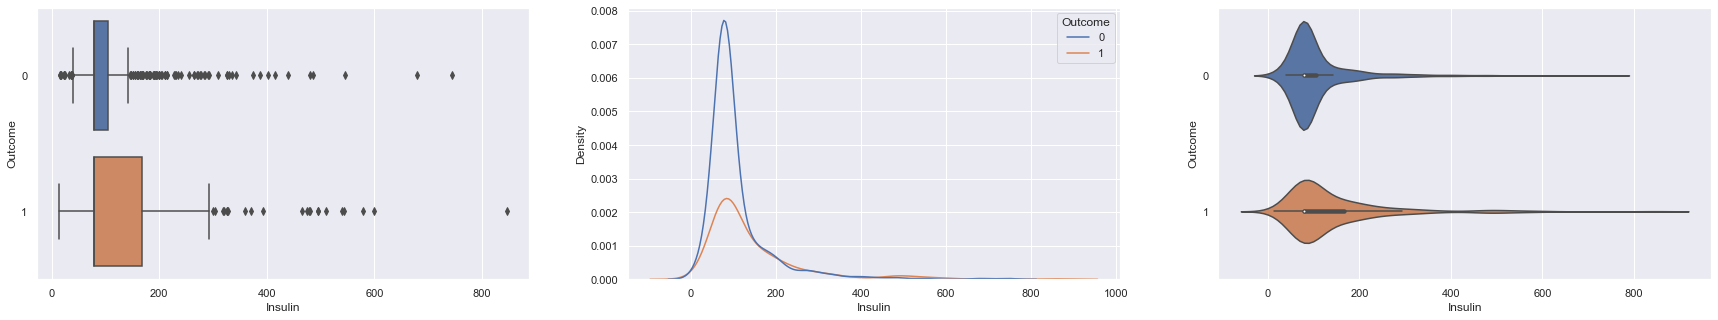

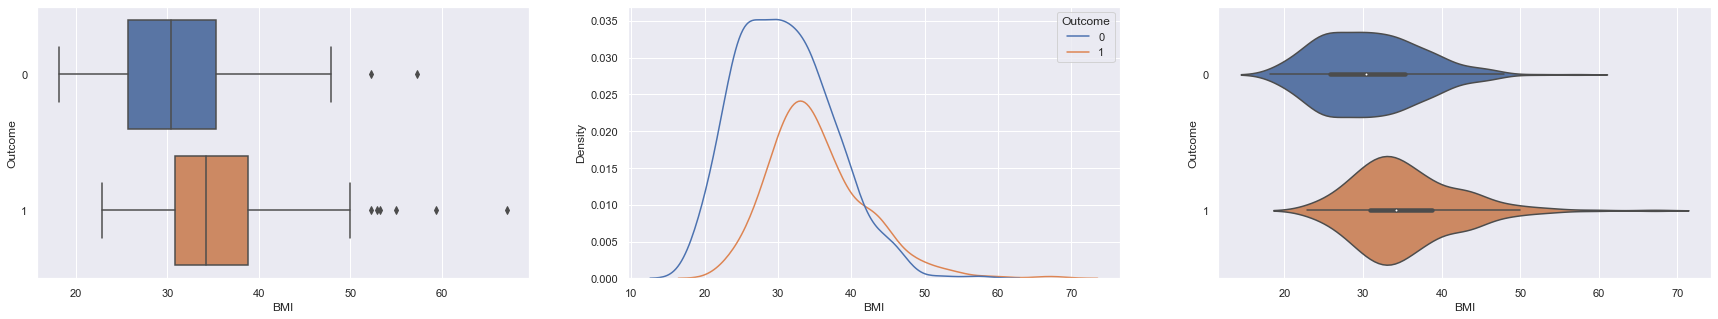

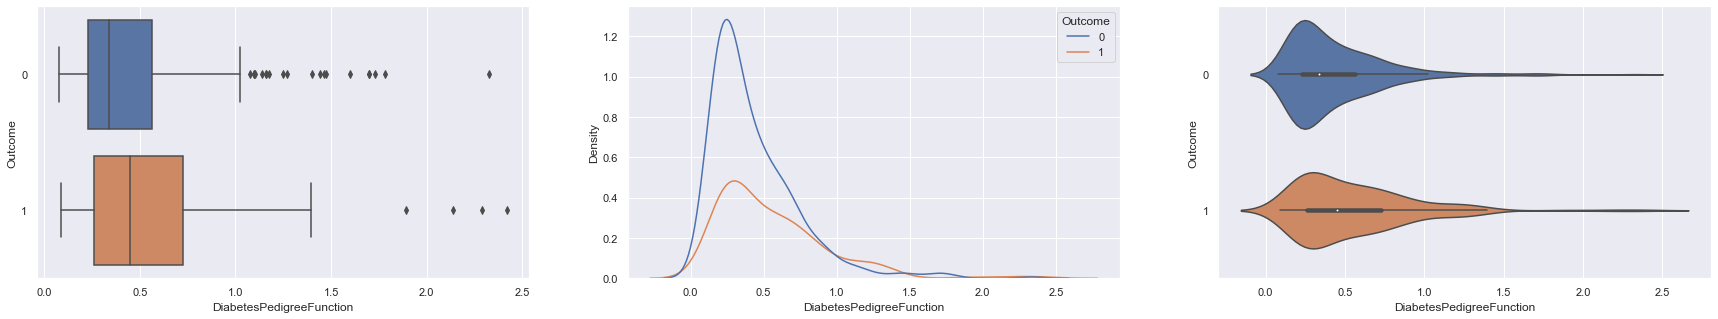

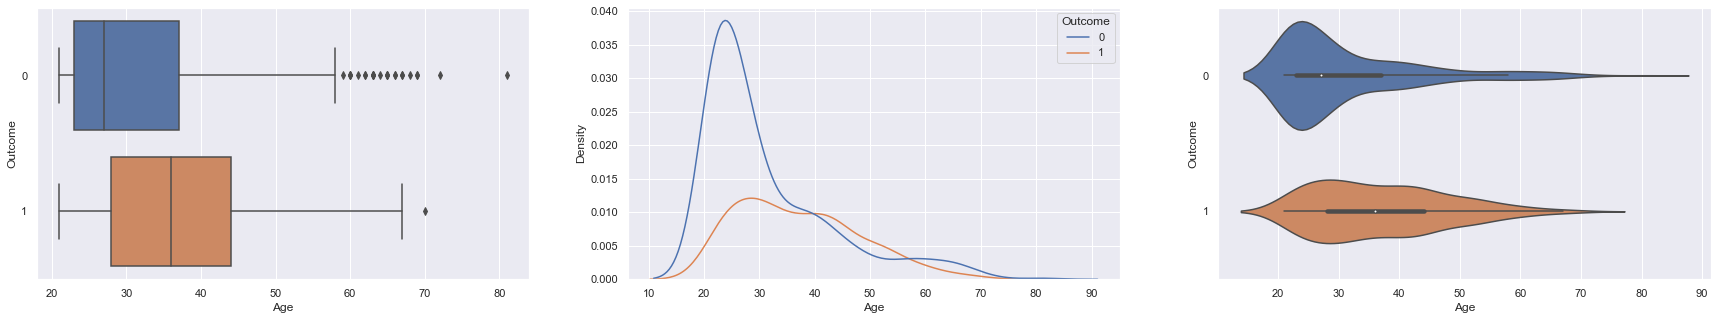

In [32]:
# Bivariate analysis with respective data against 'Outcome'
for var in tile:                                                           
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,5))                            
    sb.boxplot(data=data_new, x=var, y='Outcome', orient='h', ax=axes[0])          # box plot
    sb.kdeplot(data=data_new, x=var, hue='Outcome', ax=axes[1])                             # kde plot
    sb.violinplot(data=data_new, x=var, y='Outcome', orient='h', ax=axes[2])   # violin plot


<Figure size 1800x1800 with 0 Axes>

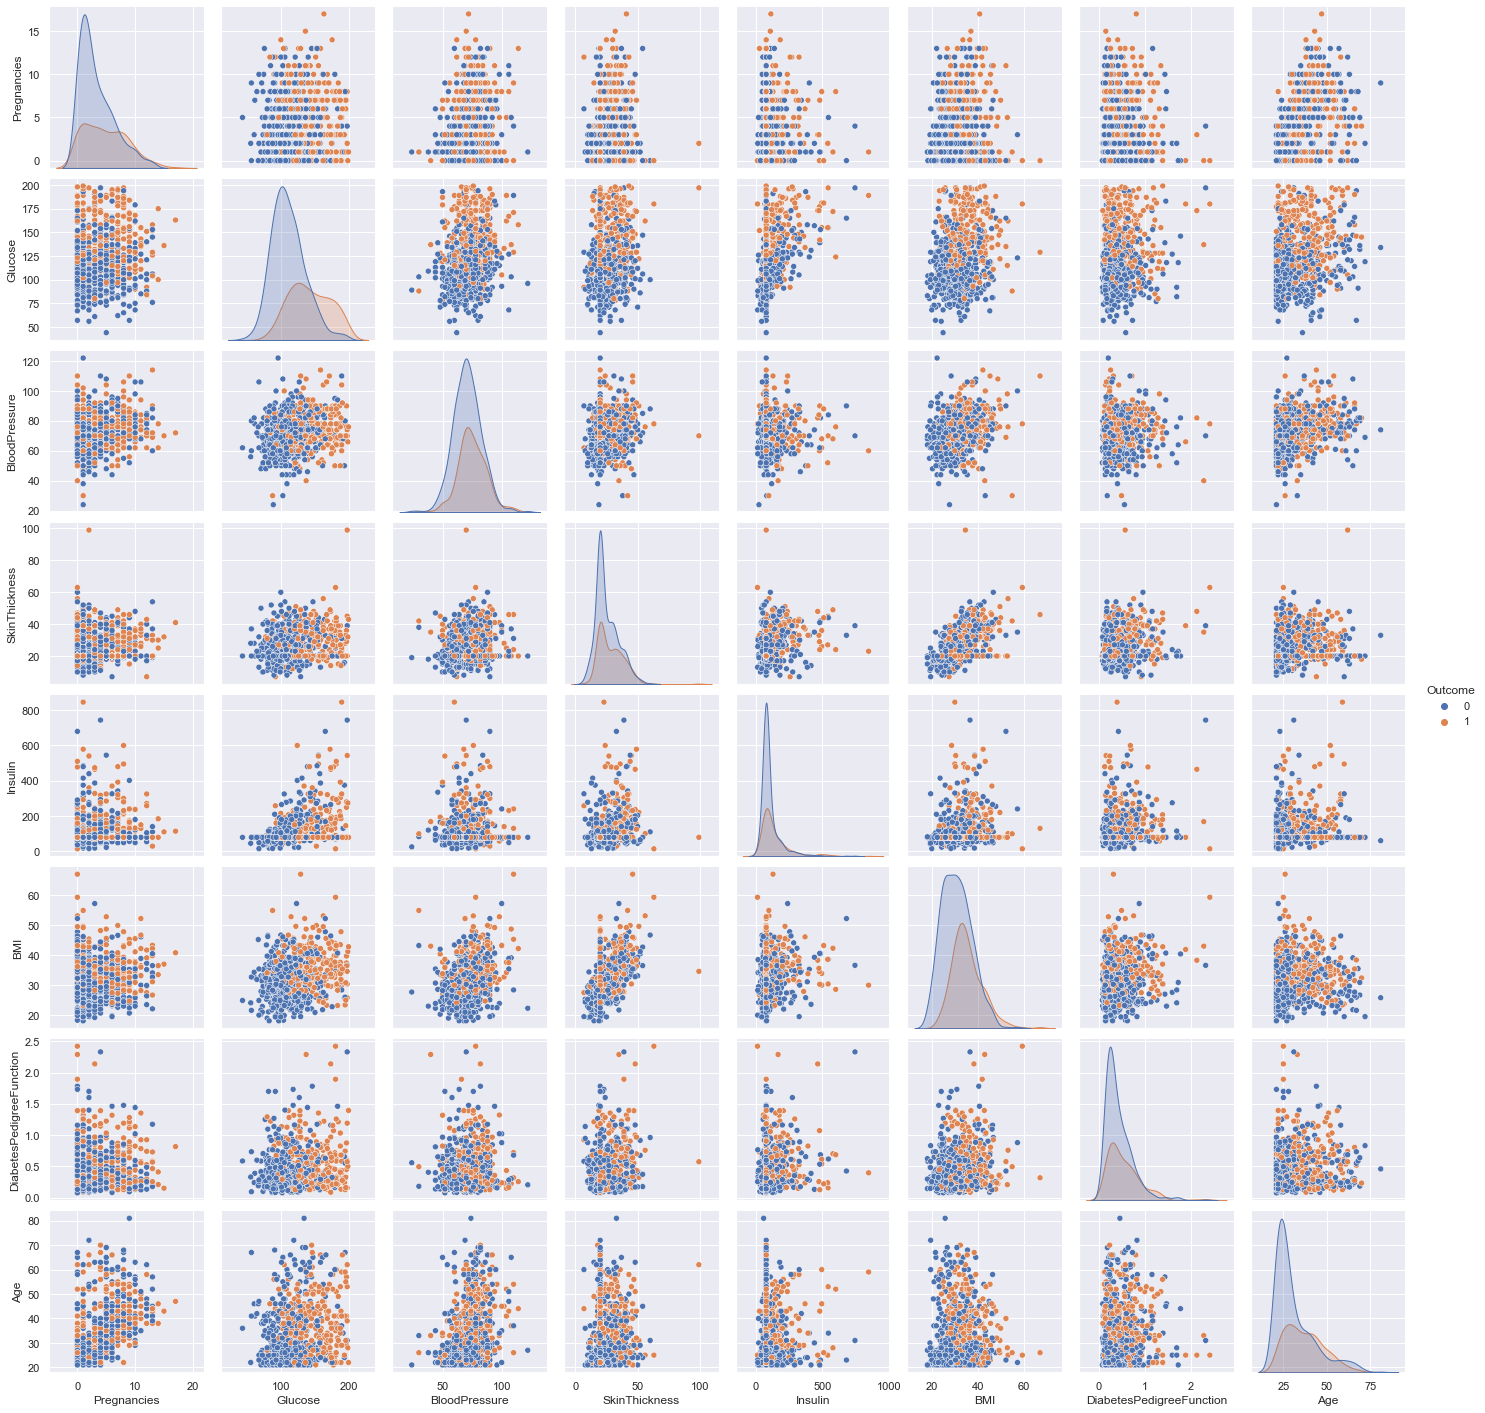

In [33]:
plt.figure(figsize=(25,25))
sb.pairplot(data= data_new, hue='Outcome')

<AxesSubplot:>

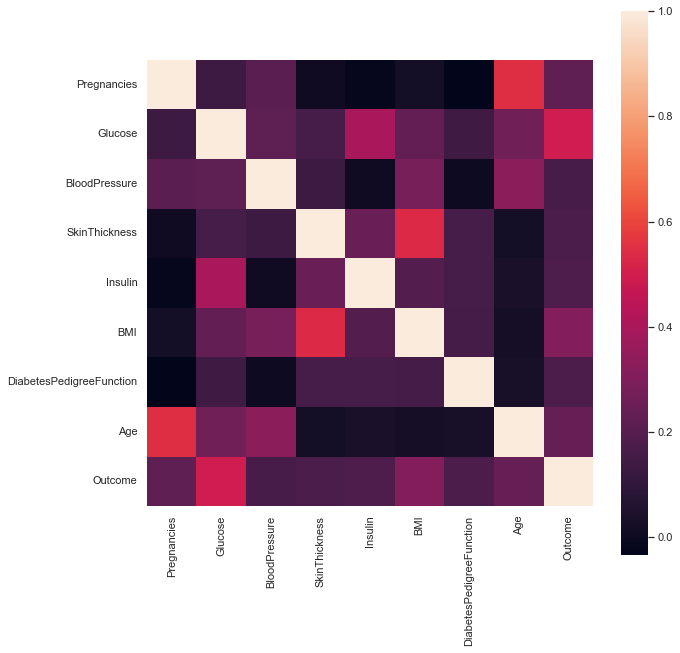

In [34]:
plt.figure(figsize=(10,10))
sb.heatmap(data= data_new.corr(), square= True)

____

## Training of the data

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

#### Split the train and test data

In [36]:
# Extract response and predictors
y = pd.DataFrame(data_new['Outcome'])
X = data_new.drop('Outcome', axis=1)

RS = 10 #random_state seed for the entire model training

#split the dataset into Train and Test 
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.8, random_state= RS)

print('Train Set size:', X_train.shape, y_train.shape)
print('Test set size:' ,X_test.shape, y_test.shape)

Train Set size: (614, 8) (614, 1)
Test set size: (154, 8) (154, 1)


___
#### **Decision Tree**

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dt = DecisionTreeClassifier(random_state= RS)
score_default = cross_val_score(dt, X_train, y_train).mean()

In [39]:
print('Accuracy of the default Decision Tree model:', score_default)

Accuracy of the default Decision Tree model: 0.7182860189257629


In [40]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

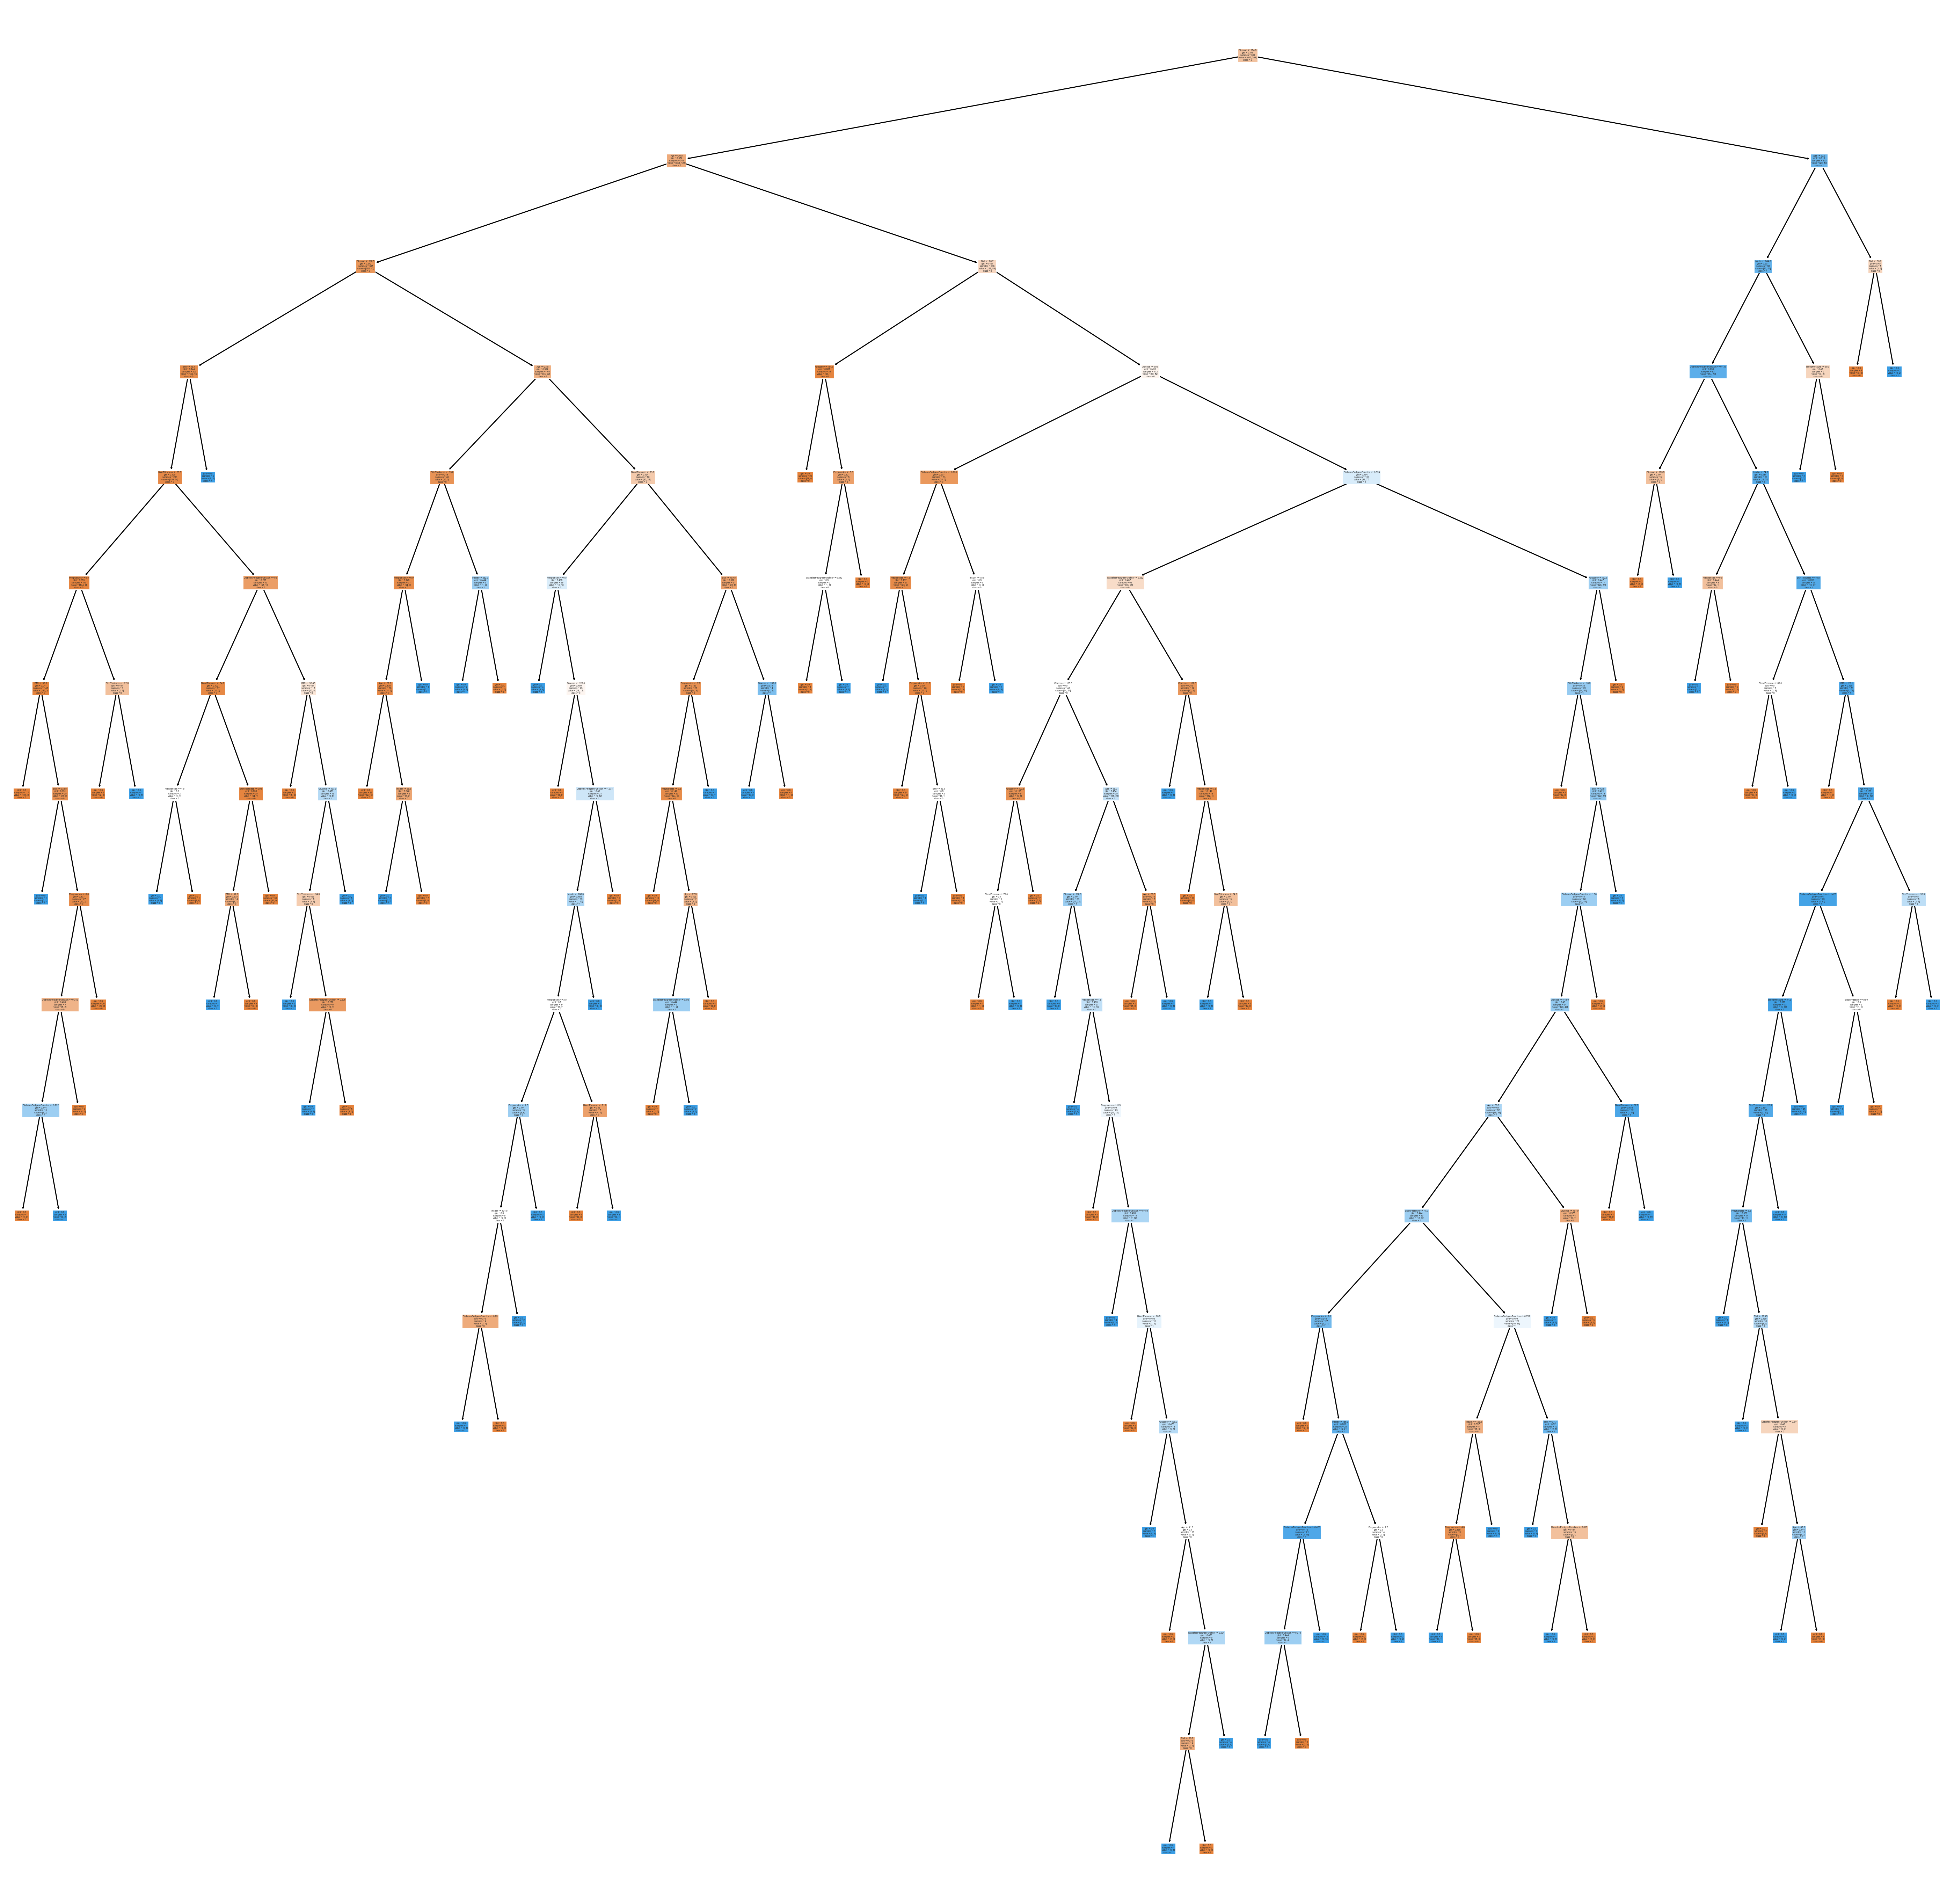

In [41]:
#plotting the tree

from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize= (100,100))

tree = plot_tree(dt
                ,feature_names= X_test.columns
                ,class_names= [str(x) for x in dt.classes_]
                ,filled=True)

for i in tree:
    arrow = i.arrow_patch

    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

plt.show()

#### Hyper parameters of Decision Tree

* `criterion` 
* `splitter` 
* `max_depth`
* `min_samples_split`
* `min_samples_leaf`
* `min_weight_fraction_leaf`
* `max_features`
* `max_leaf_nodes`
* `min_impurity_decrease`
* `class_weight`
* `ccp_alpha`

#### Pruning of the tree

In [42]:
param_grid = {'criterion':['gini','entropy']
            ,'max_depth':[1,2,3,4,6,8,10,20,40,100]
            ,'max_features': np.arange(1,8)
           # ,'splitter':['best', 'random']
            ,'min_samples_split':np.arange(2,10)
            ,'min_samples_leaf':np.arange(1,10)
}

In [43]:
dt = DecisionTreeClassifier(random_state=RS)
GSearch = GridSearchCV(dt, param_grid=param_grid, n_jobs=-1, verbose=3)
GSearch.fit(X_train, y_train)

Fitting 5 folds for each of 10080 candidates, totalling 50400 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=10), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 6, 8, 10, 20, 40, 100],
                         'max_features': array([1, 2, 3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
             verbose=3)

In [44]:
GSearch.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 7,
 'min_samples_leaf': 9,
 'min_samples_split': 2}

In [45]:
print(f'The accuracy:{GSearch.best_score_}')


The accuracy:0.7736505397840864


In [46]:
dectree = GSearch.best_estimator_
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_features=7, min_samples_leaf=9,
                       random_state=10)

In [47]:
#Train set
accuracy_train= cross_val_score(dectree, X_train, y_train ,scoring='accuracy').mean()
precision_train= cross_val_score(dectree, X_train, y_train ,scoring='precision').mean()
recall_train= cross_val_score(dectree, X_train, y_train,scoring='recall').mean()
f1_train= cross_val_score(dectree, X_train, y_train ,scoring='f1').mean()

#Test set
accuracy_test= cross_val_score(dectree, X_test, y_test,scoring='accuracy').mean()
precision_test= cross_val_score(dectree, X_test, y_test ,scoring='precision').mean()
recall_test= cross_val_score(dectree, X_test, y_test,scoring='recall').mean()
f1_test= cross_val_score(dectree, X_test, y_test ,scoring='f1').mean()

In [48]:
print('Decision Tree:\n')
print('Train set:')
print('Accuracy:',accuracy_train)
print('Precision:',precision_train)
print('Recall:',recall_train)
print('F1:',f1_train)

print('\nTest set:')
print('Accuracy:',accuracy_test)
print('Precision:',precision_test)
print('Recall:',recall_test)
print('F1:',f1_test)

Decision Tree:

Train set:
Accuracy: 0.7736505397840864
Precision: 0.6865497076023391
Recall: 0.6174216027874564
F1: 0.6478199718706048

Test set:
Accuracy: 0.7791397849462365
Precision: 0.7284632034632035
Recall: 0.6984848484848485
F1: 0.6997881176370877


In [49]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

<AxesSubplot:>

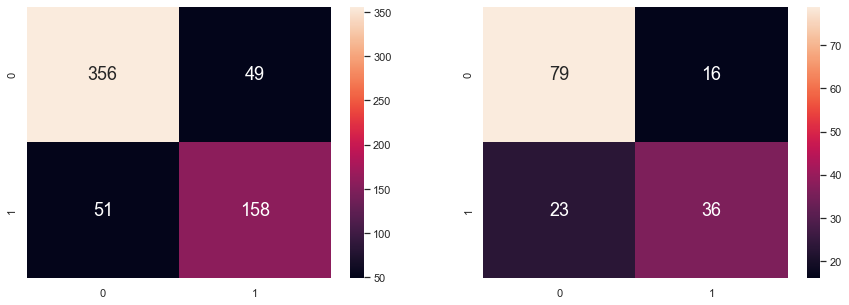

In [50]:
# Plot the Confusion Matrix for Train and Test data
f, axes = plt.subplots(1, 2, figsize=(15, 5))
sb.heatmap(confusion_matrix(y_train,y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test,y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


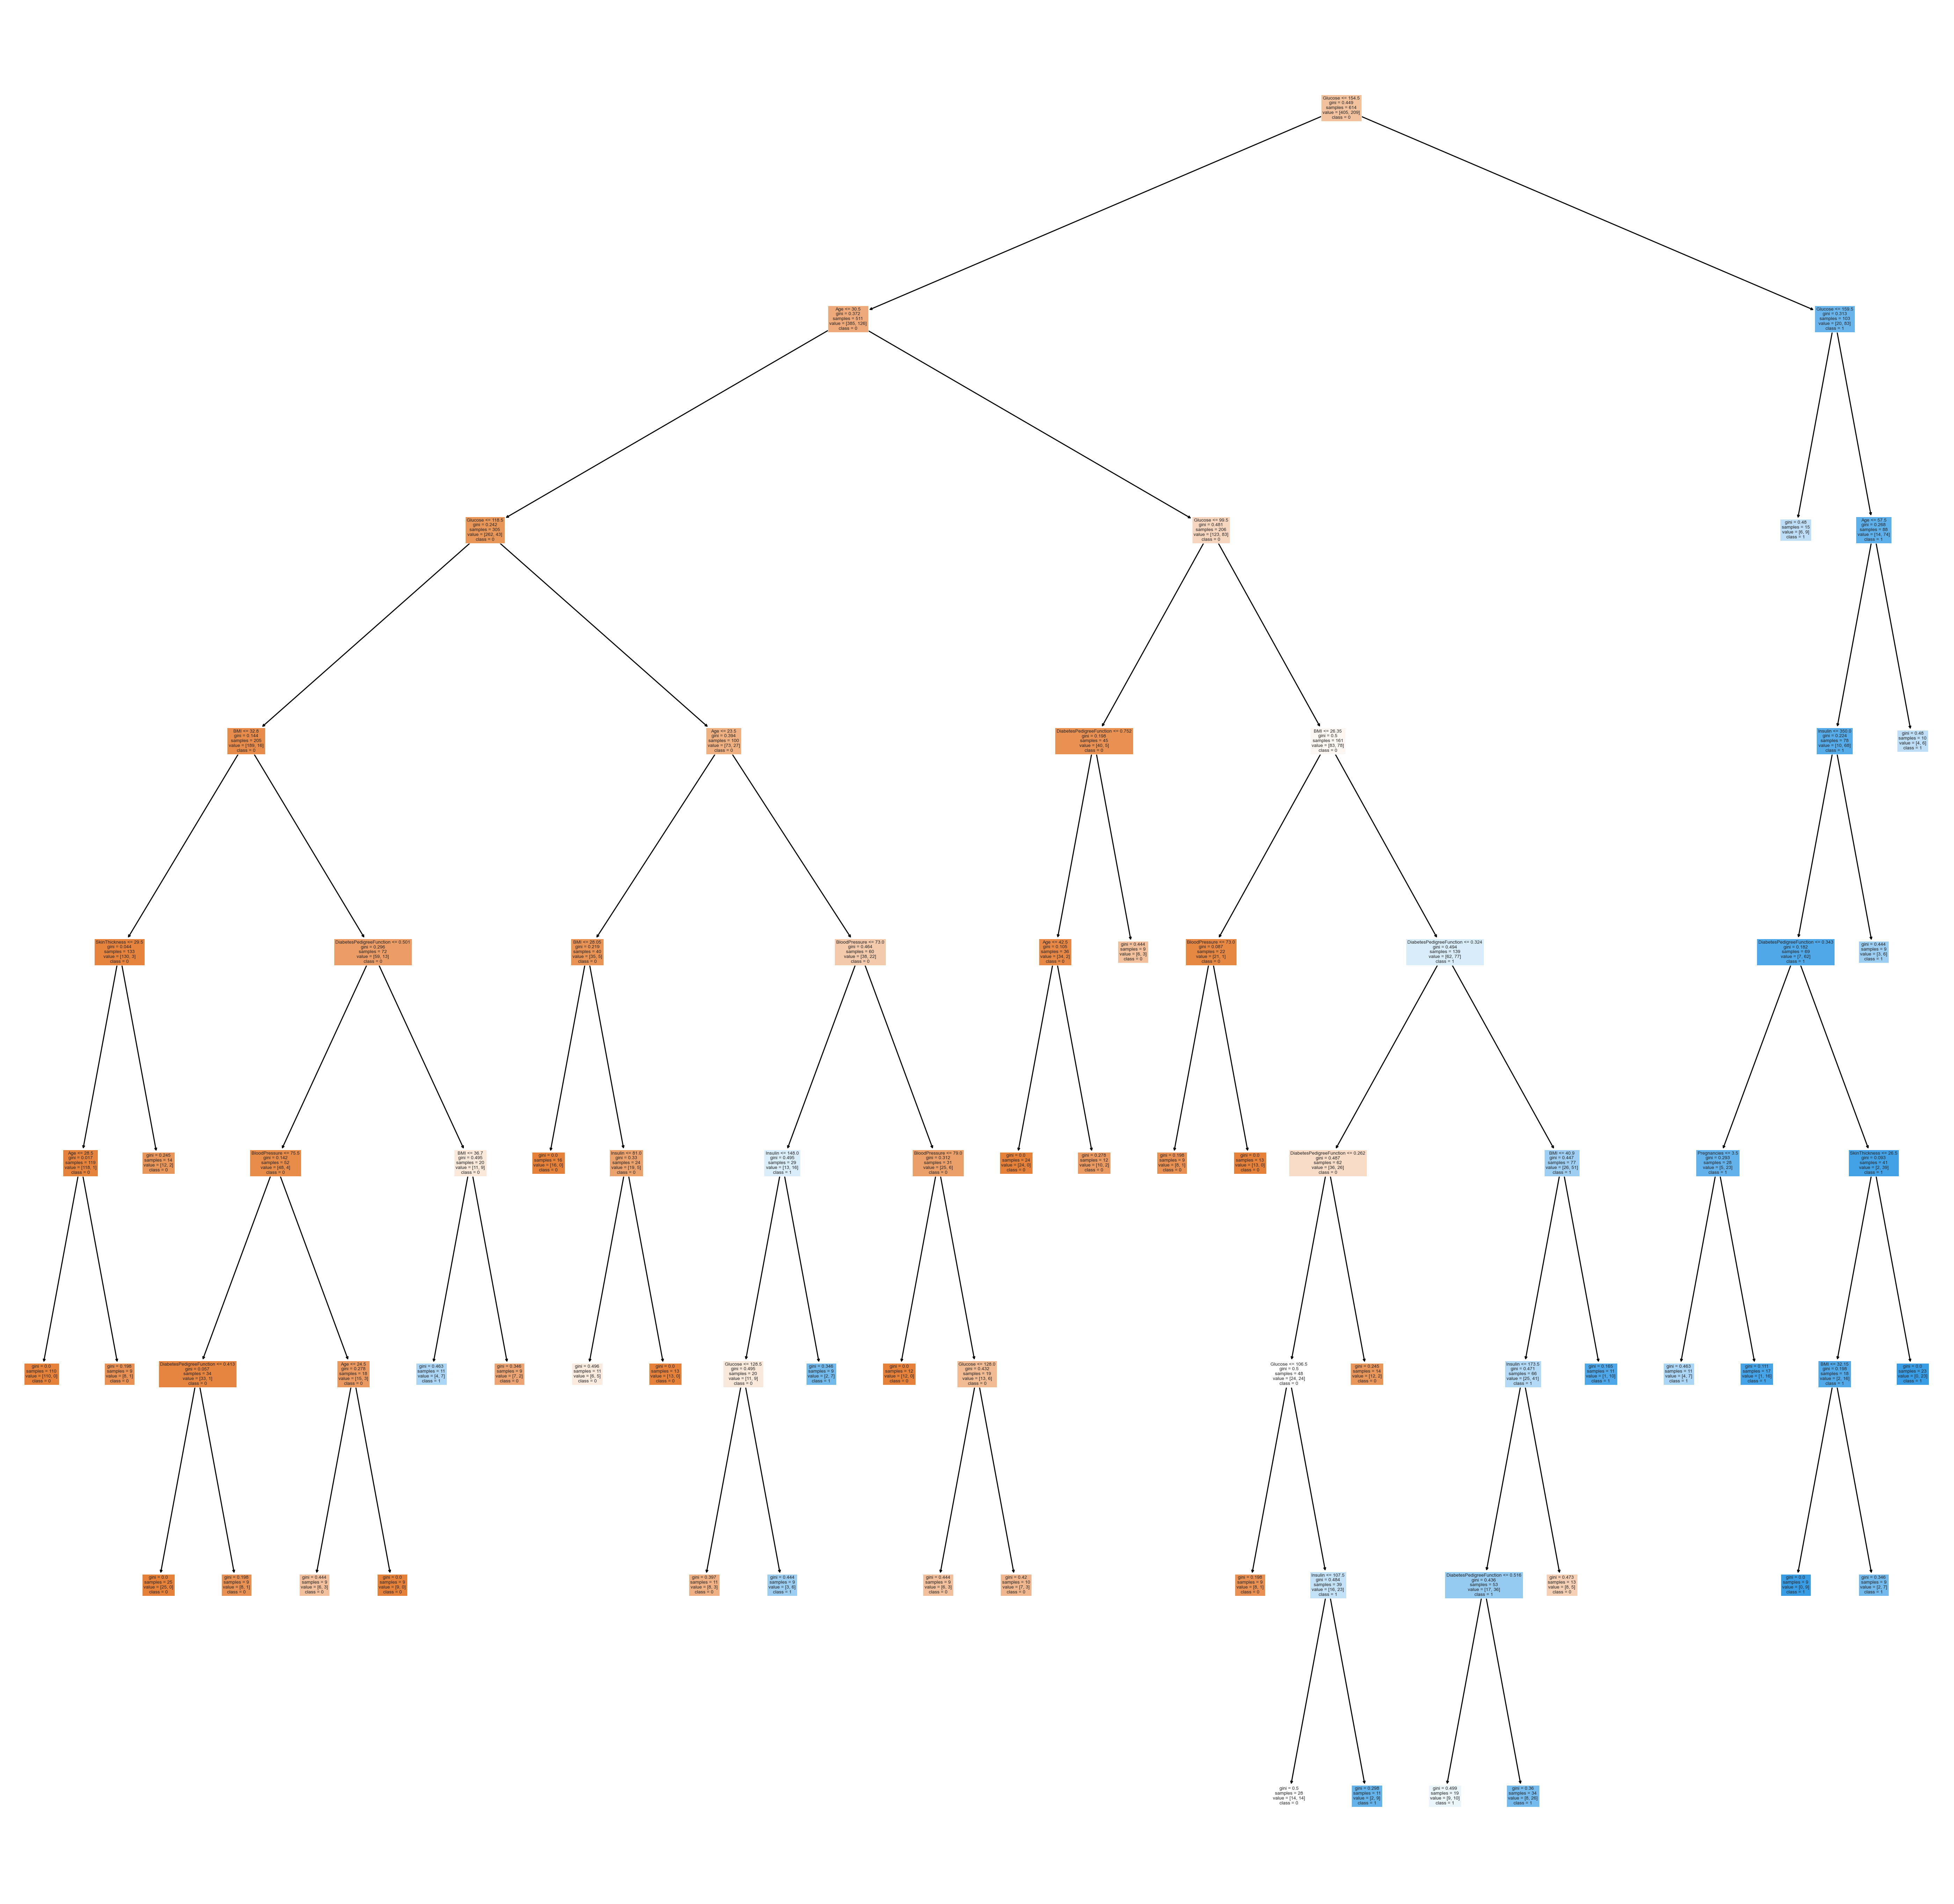

In [51]:
#plotting the tree

from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize= (100,100))

tree = plot_tree(dectree
                ,feature_names= X_test.columns
                ,class_names= [str(x) for x in dectree.classes_]
                ,filled=True)

for i in tree:
    arrow = i.arrow_patch

    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

plt.show()

In [52]:
feature = dectree.feature_importances_.transpose().tolist()
data = pd.DataFrame(feature, index= tile)
data= data.transpose()
print(feature)
print(tile)

[0.008615491463475882, 0.5190278998535767, 0.04086250879129729, 0.004874979978475571, 0.05597888841220491, 0.11588949058217392, 0.09762099468940869, 0.15712974622938713]
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


Text(0.5, 0, 'Importance of the features in decision tree')

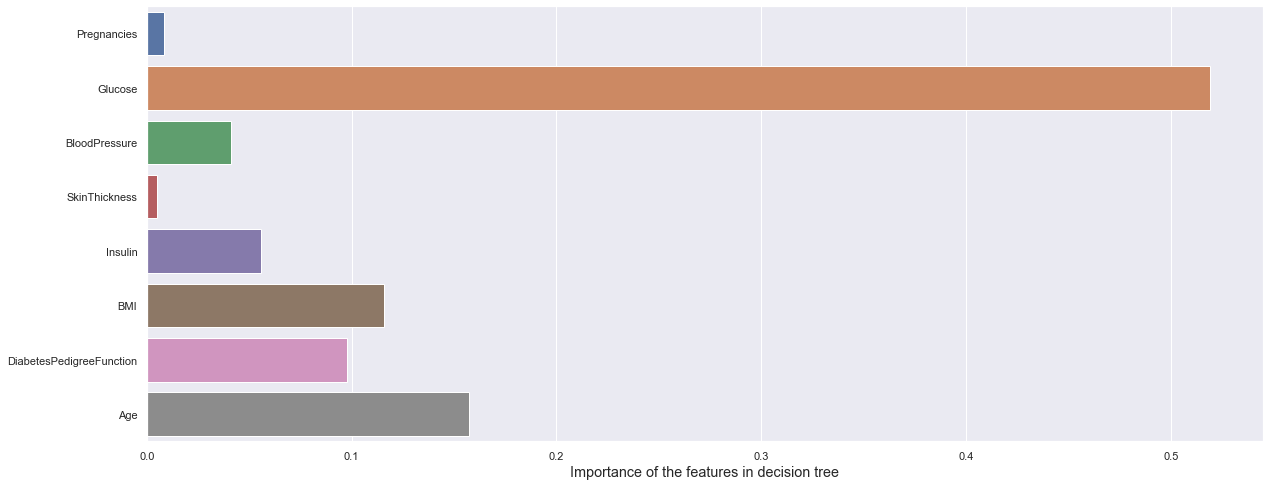

In [53]:
plt.figure(figsize=(20,8))
sb.barplot(data=data, orient='h')
plt.xlabel('Importance of the features in decision tree', size='large')


___
#### **Support Vector Machine (SVM)**

In [54]:
#import svm classifier
from sklearn.svm import SVC

In [60]:
svc_default = SVC(random_state=RS)
score_svc_default = cross_val_score(svc_default, X_train, y_train.values.flatten()).mean()

In [61]:
print(f'The default accuracy of the SVC:{score_svc_default}')

The default accuracy of the SVC:0.7752898840463814


In [62]:
svc_default.fit(X_train, y_train.values.flatten())

SVC(random_state=10)

In [66]:
support_v = svc_default.support_vectors_
support_ind = svc_default.support_